In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import seaborn as sn
import pandas as pd
import time

In [2]:
#import train and val set

if torch.cuda.is_available() == True:
    device = "cuda"
else:
    device = "cpu"

print("Device selected: ", device)
train_transform = transforms.Compose([
            transforms.Resize((120, 120)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.ColorJitter(brightness=(0.5,1), saturation=(0.5,1), contrast=(0.5,1), hue=0.5),
            transforms.ToTensor(),
            #transforms.Normalize(mean=[125,125,125], std=[225,255,255])
            ])
val_transform = transforms.Compose([
            transforms.Resize((120, 120)),
            transforms.ToTensor(),
            #transforms.Normalize(mean=[125,125,125], std=[225,255,255])
            ])

train_data = torchvision.datasets.ImageFolder(root=r'dataset\training_set', transform = train_transform)
val_data = torchvision.datasets.ImageFolder(root=r'dataset\test_set', transform= val_transform)

Device selected:  cuda


0


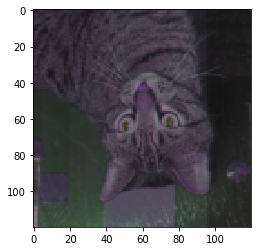

In [3]:
index = 0
print(train_data[index][1])

plt.imshow((train_data[index][0].permute(1,2,0)))

In [9]:
# Model importing

model = models.alexnet()
model.classifier = nn.Sequential(nn.Dropout(p=0.5),
                                nn.Linear(model.classifier[1].in_features, 4096),
                                nn.ReLU(),
                                nn.Dropout(p=0.5),
                                nn.Linear(4096, 512),
                                nn.ReLU(),
                                nn.Linear(512, 1),
                                nn.Sigmoid())
model.to(device)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5)
 

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.batch1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, stride=2)
        
        #self.dropout1 = nn.Dropout(0.3)
        
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.batch2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, stride=2)
        
        #self.dropout2 = nn.Dropout(0.1)
        
        self.conv3 = nn.Conv2d(64, 128 , 3)
        self.batch3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, stride=2)
        
        #self.dropout3 = nn.Dropout(0.25)
        
        self.fc1 = nn.Linear(13*13*128, 128)
        self.relu_fc1 = nn.ReLU()
        self.batch_fc1 = nn.BatchNorm1d(128)            #Not In previous model
        
        self.dropout4 = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(128, 80)
        self.relu_fc2 = nn.ReLU()
        self.batch_fc2 = nn.BatchNorm1d(80)            #Not In previous model
        
        self.dropout5 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(80, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, choice=0):
        x = x/225
        x = self.conv1(x)
        x = self.pool1(self.batch1(self.relu1(x)))

        #x = self.dropout1(x)
        
        x = self.conv2(x)
        x = self.pool2(self.batch2(self.relu2(x)))
        
        #x = self.dropout2(x)

        x = self.conv3(x)
        x = self.pool3(self.batch3(self.relu3(x)))
        
        #x = self.dropout3(x)

        #print(x.shape)
        x = x.view(-1, 13*13*128)
        x = self.batch_fc1(self.relu_fc1(self.fc1(x)))

        x = self.dropout4(x)
        
        x = self.batch_fc2(self.relu_fc2(self.fc2(x)))
        

        x = self.dropout5(x)
            
        x = self.sigmoid(self.fc3(x))
        
        return x
    
model = Net().to(device)
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batch3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=21632, out_features=128, bias=True)
  (relu_fc1): ReLU()
  (batch_fc1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.3)
  (fc2): Line

In [16]:
epochs = 40
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
loss_fn = nn.BCELoss()

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=4, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32, num_workers=4, shuffle=False)

print("                         ***   Training Start   ***")
t  =time.time()
for epoch in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    
    model.train()
    for train_batch, sample in enumerate(train_loader):
        optimizer.zero_grad()
        img, label = sample
        img = img.to(device)
        label = label.view(-1,1)
        label = label.float().to(device)
        output = model(img)
        #print(label.shape, output.shape, img.shape)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.data.item()
    train_loss = train_loss/(train_batch+1)
    model.eval()
    correct = 0
    total = 0
    for val_batch, sample in enumerate(val_loader):
        img, label = sample
        img = img.to(device)
        label = label.view(-1,1)
        label = label.to(device).float()
        output = model(img)
        #print(label.shape, output.shape, img.shape)
        loss = loss_fn(output, label)
        total += output.shape[0]
        output = (output>0.5).float()
        correct += torch.sum(torch.eq(label, output)).item()
        val_loss += loss.data.item()
    val_loss = val_loss/(val_batch+1)
    
    print("Epoch:  {:3d}, Training Loss:   {:.2f},   Val Loss:   {:.2f},   Accuracy:   {:.2f}".format(epoch+1, train_loss, val_loss, correct/total))
    
print("                         ***   Training Ended   ***")
print("Time taken: {:.2f} mins".format((time.time()-t)/60))

                         ***   Training Start   ***
Epoch:    1, Training Loss:   0.45,   Val Loss:   0.52,   Accuracy:   0.74
Epoch:    2, Training Loss:   0.45,   Val Loss:   0.55,   Accuracy:   0.73
Epoch:    3, Training Loss:   0.44,   Val Loss:   0.52,   Accuracy:   0.76
Epoch:    4, Training Loss:   0.43,   Val Loss:   0.51,   Accuracy:   0.76
Epoch:    5, Training Loss:   0.42,   Val Loss:   0.57,   Accuracy:   0.71
Epoch:    6, Training Loss:   0.42,   Val Loss:   0.55,   Accuracy:   0.73
Epoch:    7, Training Loss:   0.42,   Val Loss:   0.52,   Accuracy:   0.75
Epoch:    8, Training Loss:   0.41,   Val Loss:   0.51,   Accuracy:   0.75
Epoch:    9, Training Loss:   0.40,   Val Loss:   0.54,   Accuracy:   0.74
Epoch:   10, Training Loss:   0.40,   Val Loss:   0.55,   Accuracy:   0.73
Epoch:   11, Training Loss:   0.40,   Val Loss:   0.62,   Accuracy:   0.71
Epoch:   12, Training Loss:   0.39,   Val Loss:   0.53,   Accuracy:   0.75
Epoch:   13, Training Loss:   0.41,   Val Loss: 

In [17]:
import winsound
winsound.Beep(520, 1500)

In [18]:
model.eval()
classes = 2

def conf_mat(dataloader):
    conf_matrix = torch.zeros(classes, classes).to(device)
    for i_batch, sample in enumerate(dataloader):
        img, label = sample
        img  = img.to(device)
        label = label.to(device)
        output = model(img)
        output = (output>0.5).float()
        for p, t in zip(output.view(-1), label.view(-1)):
            conf_matrix[p.long(), t.long()] +=1
    summ = torch.sum(conf_matrix, 0)
    summ = summ.view(1,-1)
    conf_matrix = conf_matrix/summ
    conf_matrix = conf_matrix.tolist()
    
    df_cm = pd.DataFrame(conf_matrix, index = ["cat", "dog"],
                        columns = ["cat", "dog"])
    print(df_cm)
    fig, ax = plt.subplots(figsize=(7,7))
    #fig.ylabel('Predicted')
    #fig.xlabel('Actual')
    sn.heatmap(df_cm, annot=True)
    plt.show()

       cat  dog
cat  0.945  0.2
dog  0.055  0.8


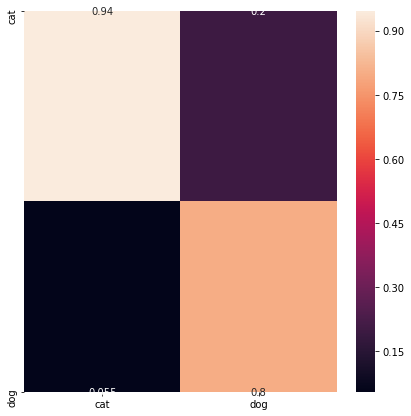

In [19]:
conf_mat(train_loader)

       cat    dog
cat  0.753  0.228
dog  0.247  0.772


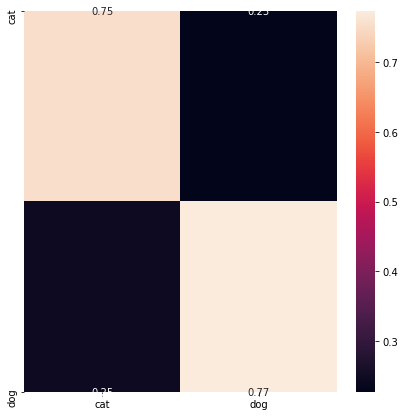

In [20]:
conf_mat(val_loader)